In [1]:

#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv(r"C:\Users\mohdr\OneDrive\Documents\Titanic_train.csv")
test = pd.read_csv(r"C:\Users\mohdr\OneDrive\Documents\Titanic_test.csv")

In [7]:
#EDA

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# numerical and categorical
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

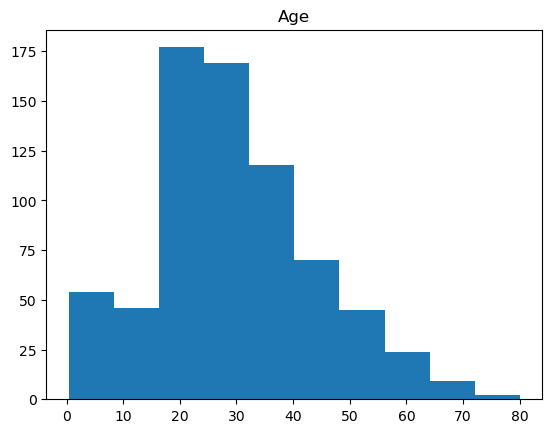

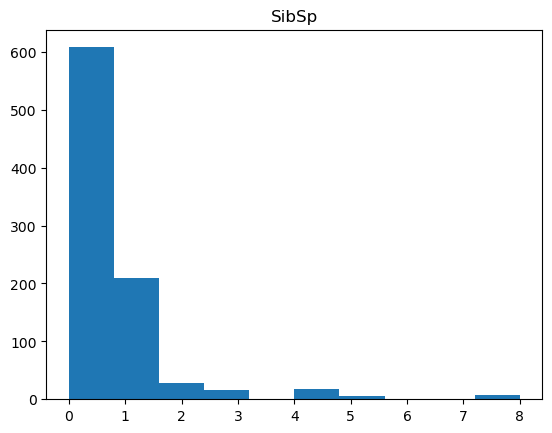

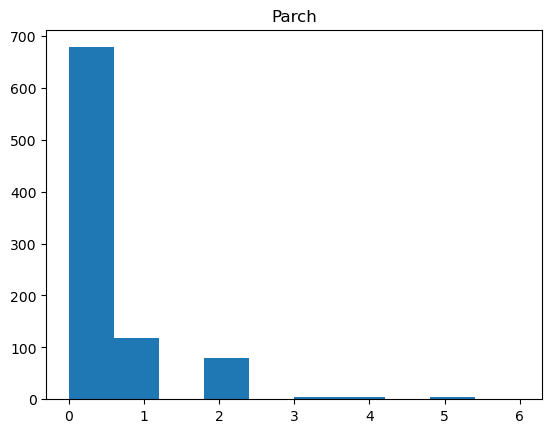

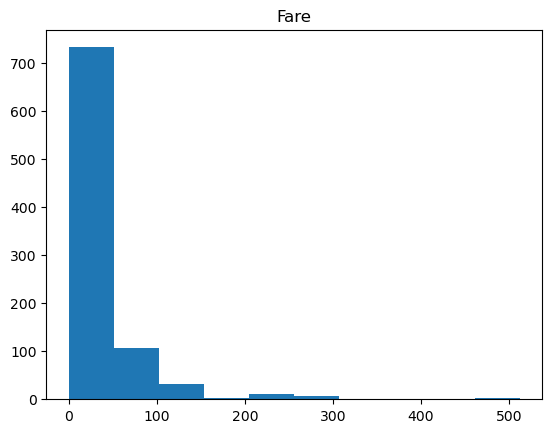

In [11]:

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

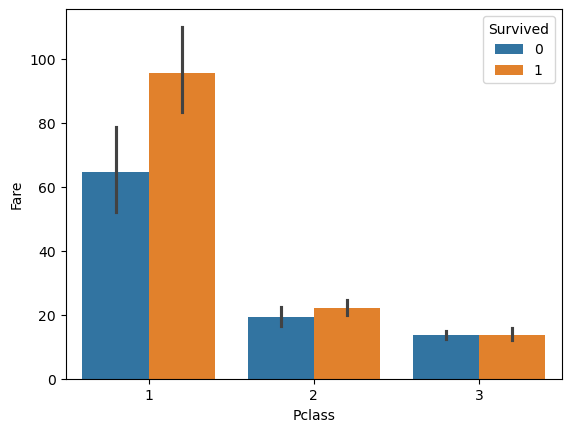

In [13]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

In [15]:
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

     

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


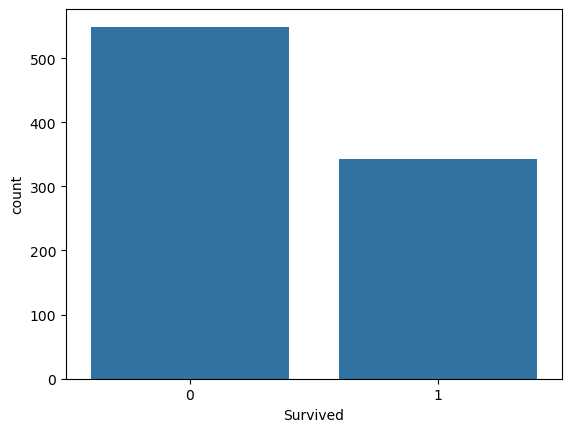

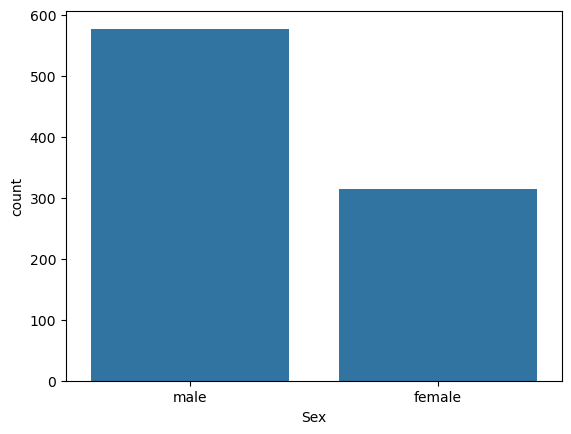

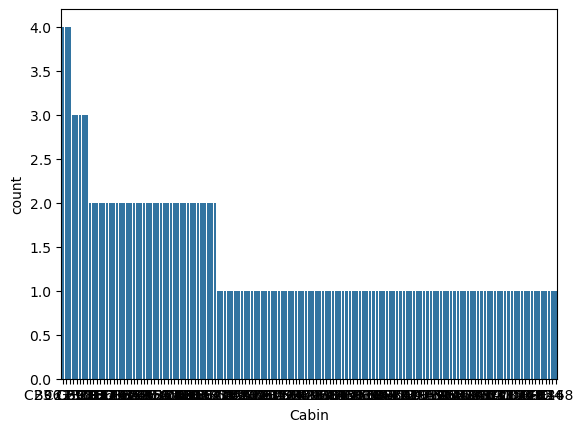

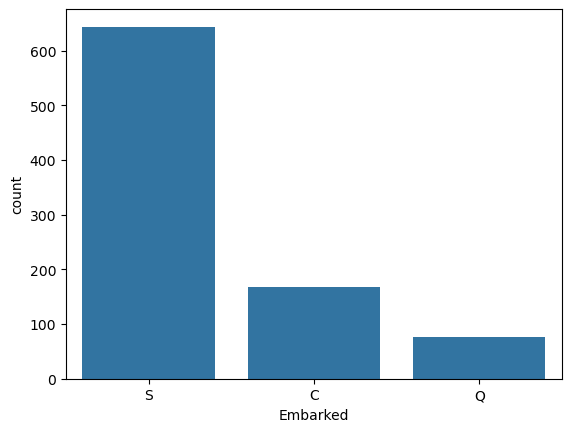

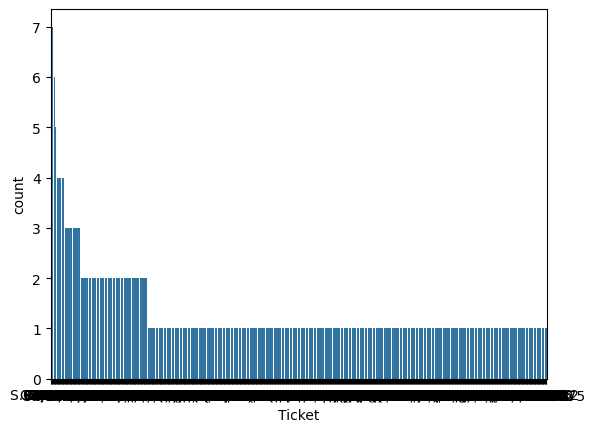

In [17]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [19]:

x = pd.DataFrame(
    (
        pd.pivot_table(
            train_data,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train_data,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Sex,female,male
Survived,,
0,81,468
1,233,109


# Data Cleaning

In [22]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [26]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())


In [28]:


train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

     

In [30]:

train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature engineering

In [33]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)

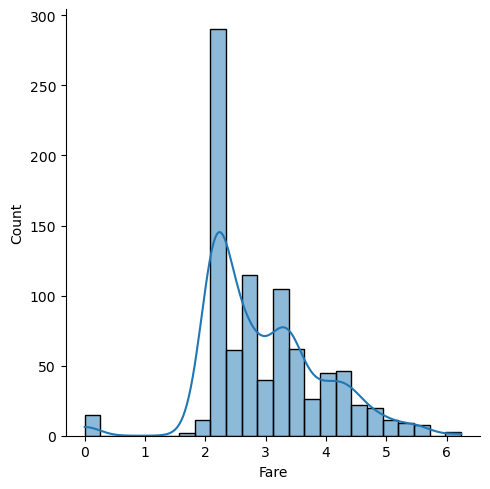

In [35]:

sns.displot(train_data["Fare"], kde=True)

<Axes: >

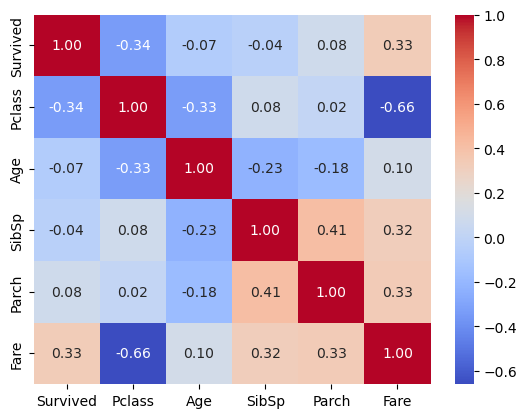

In [37]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [39]:


from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


# Test data

In [44]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df_num = test[["Age", "SibSp", "Parch", "Fare"]]
df_cat = test[[ "Sex", "Cabin", "Embarked", "Ticket"]]

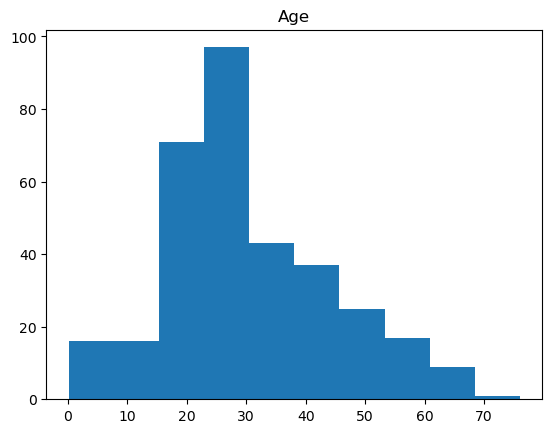

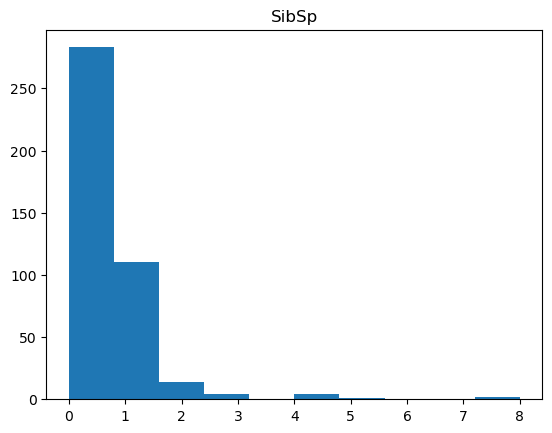

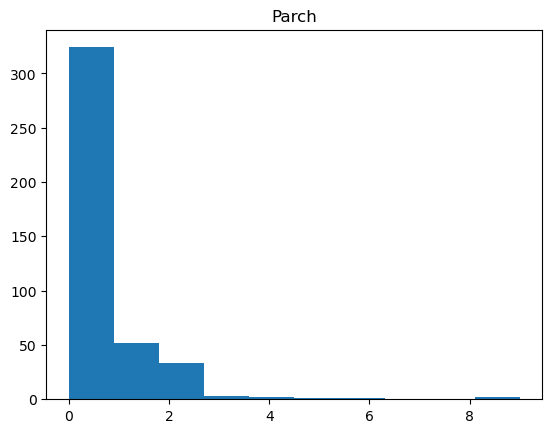

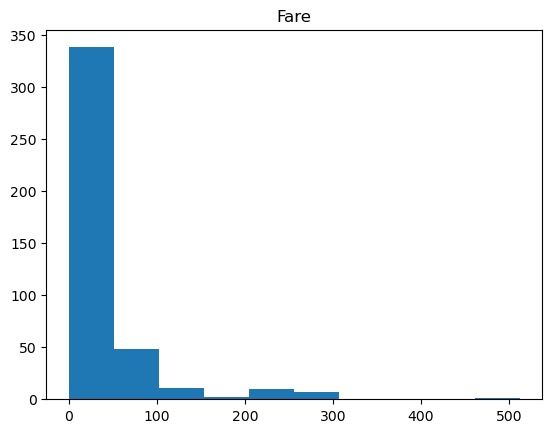

In [50]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

# Data Cleaning for test data

In [55]:

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test = test.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [59]:
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [71]:
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].mode()[0])



In [73]:

test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature engineering for test data

In [76]:
test["Fare"] = np.log(test["Fare"] + 1)

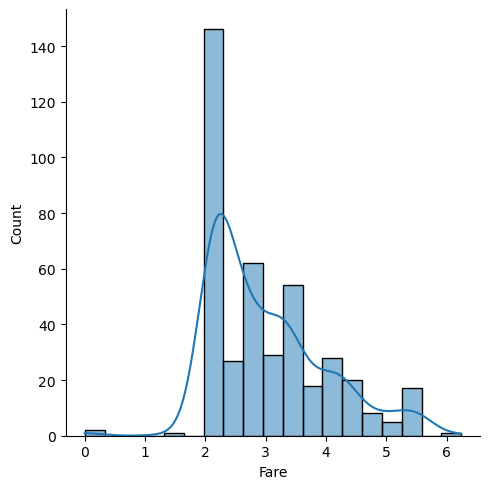

In [78]:


sns.displot(test["Fare"], kde=True)

In [80]:


from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    test[col] = le.fit_transform(test[col])

In [82]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,2.178064,2
1,3,0,47.0,1,0,2.079442,0
2,2,1,62.0,0,0,2.369075,2
3,3,1,27.0,0,0,2.268252,2
4,3,0,22.0,1,1,2.586824,2


In [89]:
X_train = train_data.drop(columns=["Survived"], axis=1)
y_train= train_data["Survived"]

X_test= test



In [91]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [93]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [99]:
# Add predictions to the test dataframe
test['predictions'] = y_pred
print(test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  predictions
0         3    1  34.50000      0      0  2.178064         2            0
1         3    0  47.00000      1      0  2.079442         0            0
2         2    1  62.00000      0      0  2.369075         2            1
3         3    1  27.00000      0      0  2.268252         2            1
4         3    0  22.00000      1      1  2.586824         2            1
..      ...  ...       ...    ...    ...       ...       ...          ...
413       3    1  30.27259      0      0  2.202765         2            0
414       1    0  39.00000      0      0  4.699571         2            1
415       3    1  38.50000      0      0  2.110213         2            0
416       3    1  30.27259      0      0  2.202765         2            0
417       3    1  30.27259      1      1  3.150952         2            0

[418 rows x 8 columns]


In [101]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.74301676 0.78089888 0.79775281 0.75280899 0.80898876]
Mean Cross-Validation Score: 0.7766932395957566


In [103]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

In [105]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [107]:


from xgboost import XGBClassifier

model = XGBClassifier()


In [109]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.79888268 0.81460674 0.84269663 0.78089888 0.83707865]
Mean Cross-Validation Score: 0.8148327160881301


In [111]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.7877095  0.79775281 0.85393258 0.76966292 0.83146067]
Mean Cross-Validation Score: 0.8081036971941498
